In [27]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to my database
# Database connection parameters
conn = psycopg2.connect(
    host="",
    port="",  
    database="",  
    user="",  
    password=""  
)

cursor = conn.cursor()

In [28]:
# Query to retrieve UCLA offensive stats along with weather, altitude, and distance
query = """
SELECT date, raw_location, opponent, 
       passing_cmp, passing_att, completion_pct, passing_yds, passing_td, 
       rushing_att, rushing_yds, rushing_avg, rushing_td, total_plays, total_yards, avg_yds,
       pass_first_downs, rush_first_downs, first_down_pens, total_first_downs, 
       total_penalties, total_penalties_yds, total_fum, total_int, total_to,
       temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM UCLA_Offensive_Stats;
"""

ucla_data = pd.read_sql(query, conn)

# Display the first few rows of the data
ucla_data.head()

/var/folders/d0/gj8tfnxn3jd2gjx88tk4mp180000gn/T/ipykernel_51037/3984677986.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ucla_data = pd.read_sql(query, conn)


,date,raw_location,opponent,passing_cmp,passing_att,completion_pct,passing_yds,passing_td,rushing_att,rushing_yds,...,total_penalties,total_penalties_yds,total_fum,total_int,total_to,temp_f,precipitation_in,windspeed_mph,altitude_m,distance_from
0,2022-10-22,@,Oregon,27,39,69.2,262,2,30,186,...,6,65,0,1,1,51.4,0.208,13.3,130.0,732.25
1,2022-10-29,H,Stanford,18,29,62.1,199,0,45,324,...,6,50,1,0,1,63.5,0.000,7.6,263.0,0.00
2,2022-11-05,@,Arizona State,13,20,65.0,169,2,42,402,...,6,75,1,1,2,58.0,0.000,8.1,366.0,377.52
3,2022-11-12,H,Arizona,26,39,66.7,245,1,37,219,...,4,23,1,0,1,58.2,0.000,5.3,263.0,0.00
4,2022-11-19,H,Southern California,23,38,60.5,309,4,37,204,...,6,35,2,3,5,60.9,0.000,2.6,263.0,0.00


In [29]:


# Define distance ranges (you can adjust these as needed)
bins = [0, 400, 750, 1000, 1500, 4000]
labels = ['<400', '400-750', '750-1000', '1000-1500', '1500']

# Create a new column for distance categories
ucla_data['Distance_Range'] = pd.cut(ucla_data['distance_from'], bins=bins, labels=labels, right=False)

# Group by distance range and calculate mean values for the metrics
distance_grouped = ucla_data.groupby('Distance_Range').agg({
    'passing_yds': 'mean',
    'rushing_yds': 'mean',
    'total_yards': 'mean',
    'completion_pct': 'mean',
    'passing_td': 'mean',
    'rushing_att': 'mean',
    'passing_att': 'mean',   # Include passing_att here
    'rushing_td': 'mean',
    'total_first_downs': 'mean',
    'total_to': 'mean'
}).reset_index()

# Display the grouped data
distance_grouped.head()


/var/folders/d0/gj8tfnxn3jd2gjx88tk4mp180000gn/T/ipykernel_51037/3474002596.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_grouped = ucla_data.groupby('Distance_Range').agg({


,Distance_Range,passing_yds,rushing_yds,total_yards,completion_pct,passing_td,rushing_att,passing_att,rushing_td,total_first_downs,total_to
0,<400,273.200000,180.452632,453.652632,63.996842,1.978947,38.431579,34.557895,2.094737,23.389474,1.484211
1,400-750,211.352941,168.411765,379.764706,58.570588,1.352941,40.294118,32.294118,1.529412,20.882353,1.764706
2,750-1000,261.000000,176.000000,437.000000,62.015385,2.230769,34.692308,35.076923,1.692308,22.153846,1.538462
3,1000-1500,250.600000,202.400000,453.000000,62.040000,1.600000,45.800000,31.200000,1.800000,23.000000,1.200000
4,1500,287.000000,116.000000,403.000000,50.100000,2.000000,36.666667,38.666667,1.000000,19.666667,3.000000


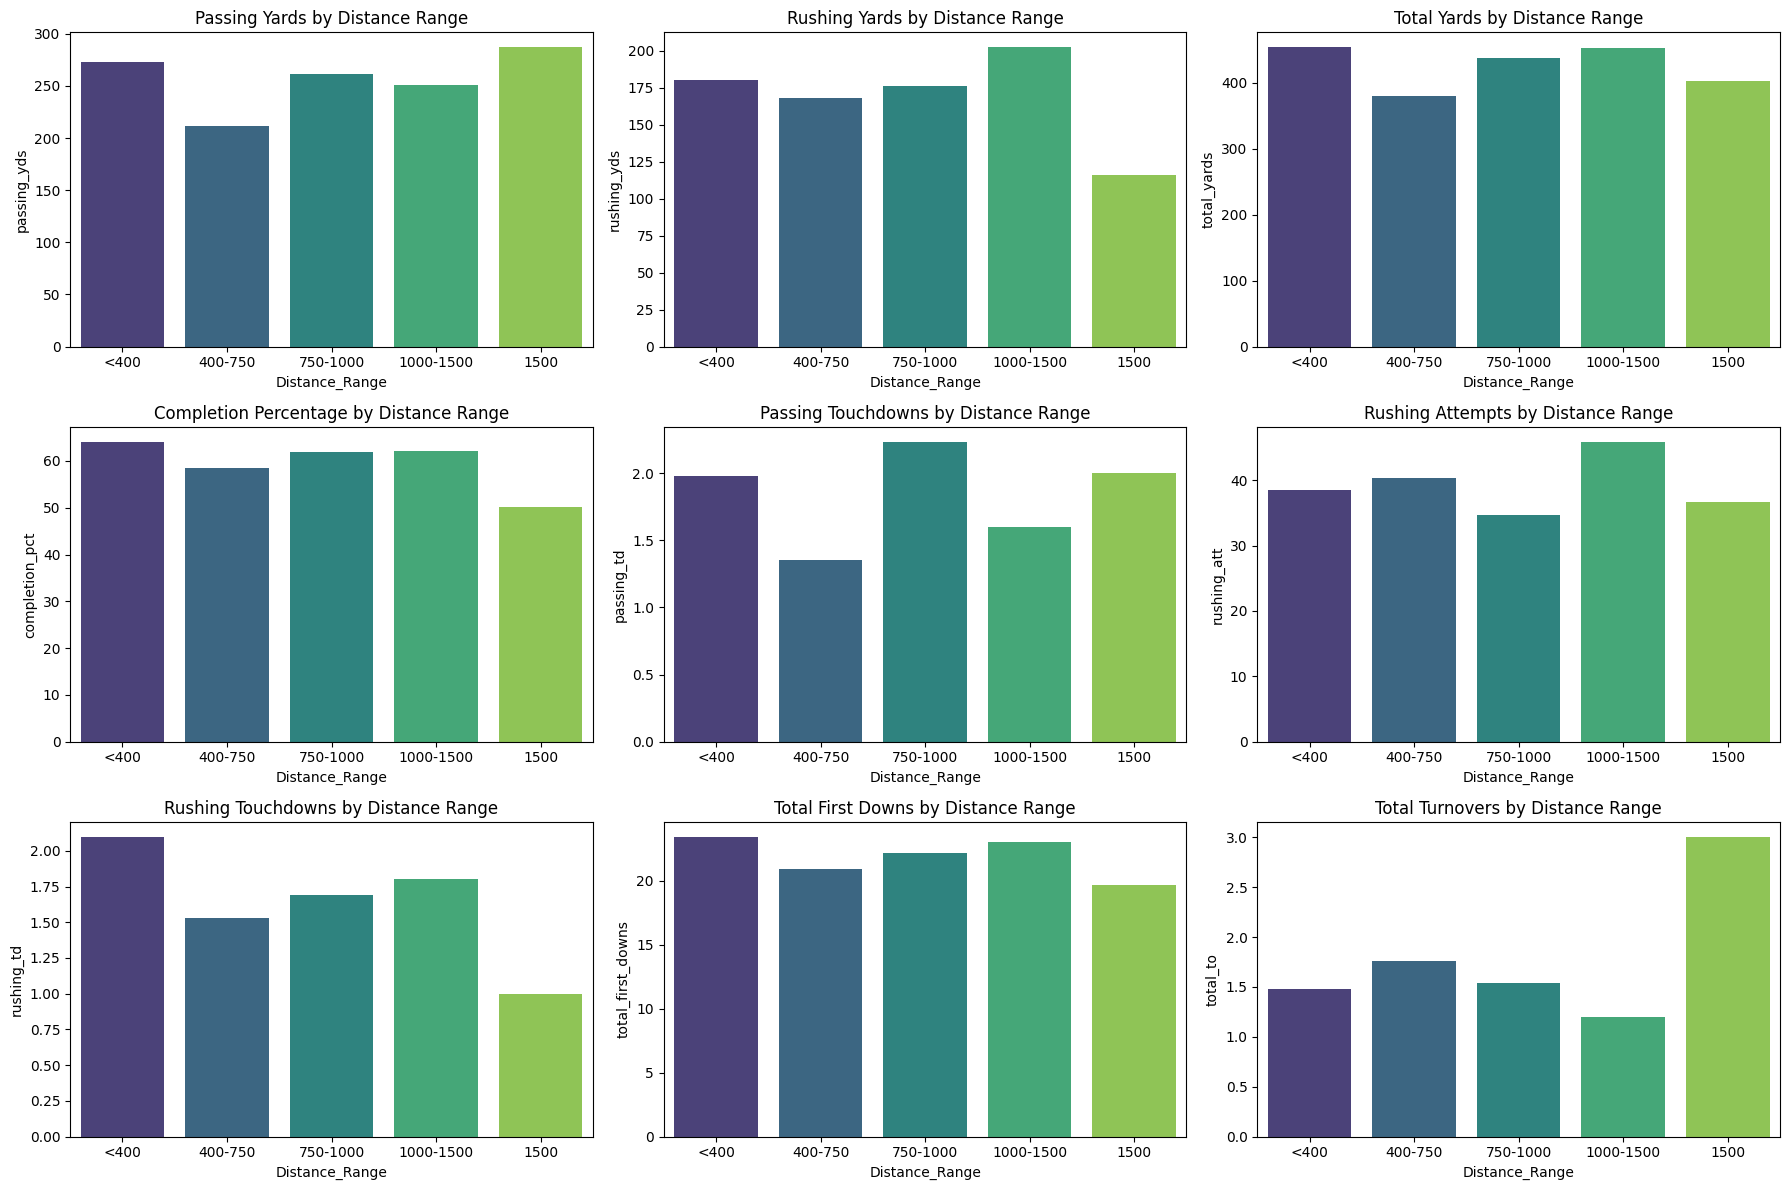

In [30]:
# Set up the plot
fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# Passing Yards
sns.barplot(x='Distance_Range', y='passing_yds', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 0], legend=False)
axs[0, 0].set_title('Passing Yards by Distance Range')

# Rushing Yards
sns.barplot(x='Distance_Range', y='rushing_yds', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 1], legend=False)
axs[0, 1].set_title('Rushing Yards by Distance Range')

# Total Yards
sns.barplot(x='Distance_Range', y='total_yards', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 2], legend=False)
axs[0, 2].set_title('Total Yards by Distance Range')

# Completion Percentage
sns.barplot(x='Distance_Range', y='completion_pct', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 0], legend=False)
axs[1, 0].set_title('Completion Percentage by Distance Range')

# Passing Touchdowns
sns.barplot(x='Distance_Range', y='passing_td', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 1], legend=False)
axs[1, 1].set_title('Passing Touchdowns by Distance Range')

# Rushing Attempts
sns.barplot(x='Distance_Range', y='rushing_att', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 2], legend=False)
axs[1, 2].set_title('Rushing Attempts by Distance Range')

# Rushing Touchdowns
sns.barplot(x='Distance_Range', y='rushing_td', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 0], legend=False)
axs[2, 0].set_title('Rushing Touchdowns by Distance Range')

# Total First Downs
sns.barplot(x='Distance_Range', y='total_first_downs', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 1], legend=False)
axs[2, 1].set_title('Total First Downs by Distance Range')

# Total Turnovers
sns.barplot(x='Distance_Range', y='total_to', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 2], legend=False)
axs[2, 2].set_title('Total Turnovers by Distance Range')

# Adjust layout
plt.tight_layout()
plt.show()


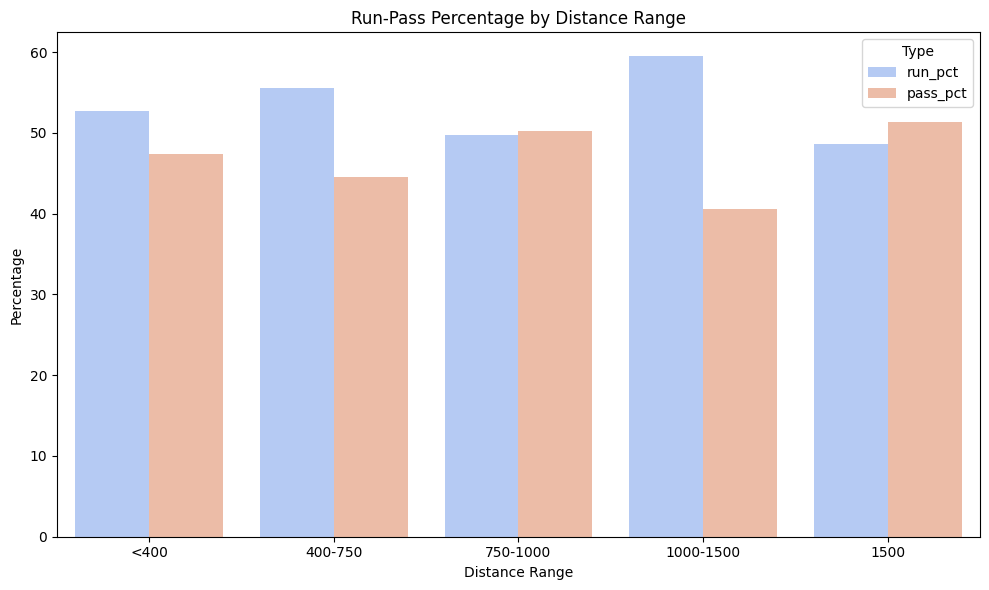

In [31]:
# Calculate Run-Pass Percentage
distance_grouped['run_pct'] = distance_grouped['rushing_att'] / (distance_grouped['rushing_att'] + distance_grouped['passing_att']) * 100
distance_grouped['pass_pct'] = distance_grouped['passing_att'] / (distance_grouped['rushing_att'] + distance_grouped['passing_att']) * 100

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Run and Pass Percentages side by side
distance_grouped_melted = pd.melt(distance_grouped, id_vars=['Distance_Range'], value_vars=['run_pct', 'pass_pct'], var_name='Type', value_name='Percentage')

sns.barplot(x='Distance_Range', y='Percentage', hue='Type', data=distance_grouped_melted, palette='coolwarm')

# Add titles and labels
ax.set_title('Run-Pass Percentage by Distance Range')
ax.set_ylabel('Percentage')
ax.set_xlabel('Distance Range')

# Display the plot
plt.tight_layout()
plt.show()


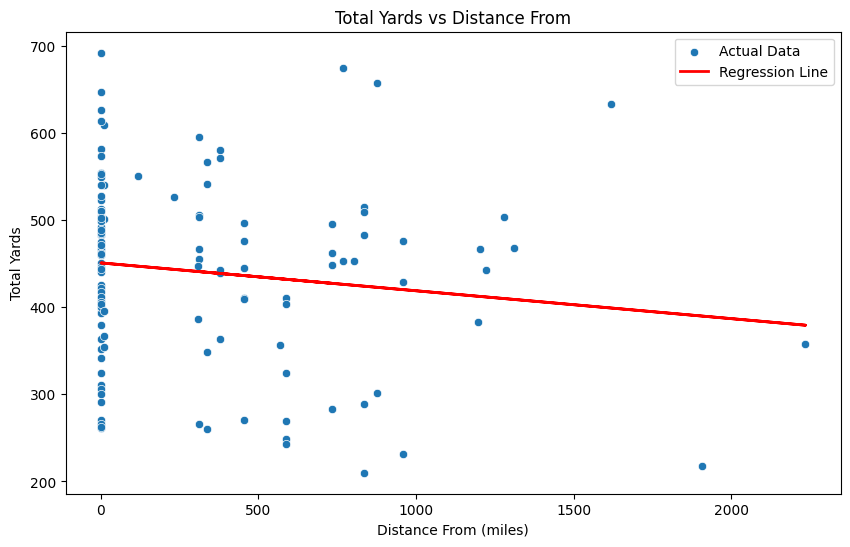

Regression Coefficient: -0.031976253064138524
Intercept: 450.786357835467


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data
X = ucla_data[['distance_from']].dropna()  # Predictor (independent variable)
y = ucla_data['total_yards'].dropna()      # Target (dependent variable)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values using the model
y_pred = model.predict(X)

# Visualize the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ucla_data['distance_from'], y=ucla_data['total_yards'], label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Total Yards vs Distance From')
plt.xlabel('Distance From (miles)')
plt.ylabel('Total Yards')
plt.legend()
plt.show()

# Print the regression coefficient and intercept
print(f"Regression Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
